# Time- and zonal-mean temperature

This notebook is coverted from plt_meridional.py, which plots time- and zonal-mean temperature. 

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog.nc','r')

In [3]:
xh = data.variables['xh'][:]   # v,temp
yh = data.variables['yh'][:]   # u,temp
zl = data.variables['zl'][:]
t  = data.variables['Time'][:]

In [4]:
nz = np.size(zl)
nx = np.size(xh)
ny = np.size(yh)
nt = np.size(t)

In [5]:
temp3 = np.zeros((1,nz,ny))
tempx = np.full((1,nz,ny),np.nan)

In [6]:
for k in xrange(0,nt):
    print k
    temp  = data.variables['temp'][k,:,:,:]

    tempx[0,:,:] = np.nanmean(temp,axis=-1) # zonal-mean
 
    temp3 = np.append(temp3,tempx,0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [10]:
temp3 = temp3[1:,:,:]
temp2 = np.nanmean(temp3,axis=0)

In [11]:
%matplotlib inline

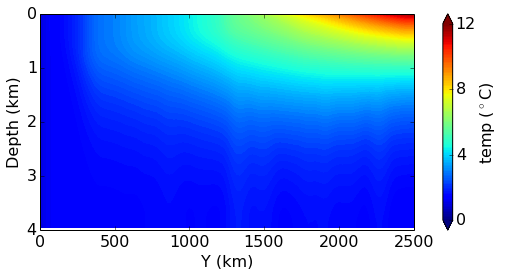

In [12]:
plt.figure(1,figsize=(8,5))

t_level = np.arange(0,12+0.1,0.1)
t_ticks = np.arange(0,12+4,4)

pc3 = plt.contourf(yh,zl,temp2,cmap=plt.cm.jet,levels=t_level,extend='both')
c3 = plt.colorbar(pc3,ticks=t_ticks)
plt.gca().invert_yaxis()
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
c3.ax.set_position([0.85,0.2,0.03,0.6])
c3.set_label('temp ($^\circ$C)',y=0.5,fontsize=16)
c3.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_merid_temp_y50.png',dpi=600)

plt.show()